In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf 

In [ ]:
#py.offline.init_notebook_mode(connected= True)

In [ ]:
cd=pd.read_excel('/content/gdrive/My Drive/ML_Projects/Capstone/Cap/Customer_Data.xlsx')
invoice=pd.read_csv('/content/gdrive/My Drive/ML_Projects/Capstone/Cap/Final_invoice.csv')
jtd= pd.read_csv('/content/gdrive/My Drive/ML_Projects/Capstone/Cap/JTD.csv')
pm = pd.read_excel('/content/gdrive/My Drive/ML_Projects/Capstone/Cap/Plant Master.xlsx')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.



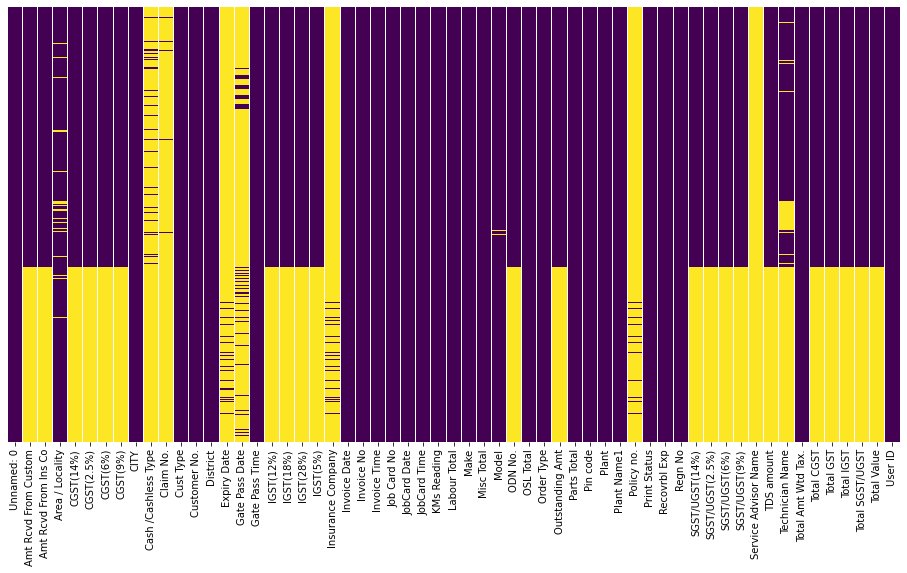

In [ ]:
fig,ax = plt.subplots(figsize = (16,8))
sns.heatmap(invoice.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.show()

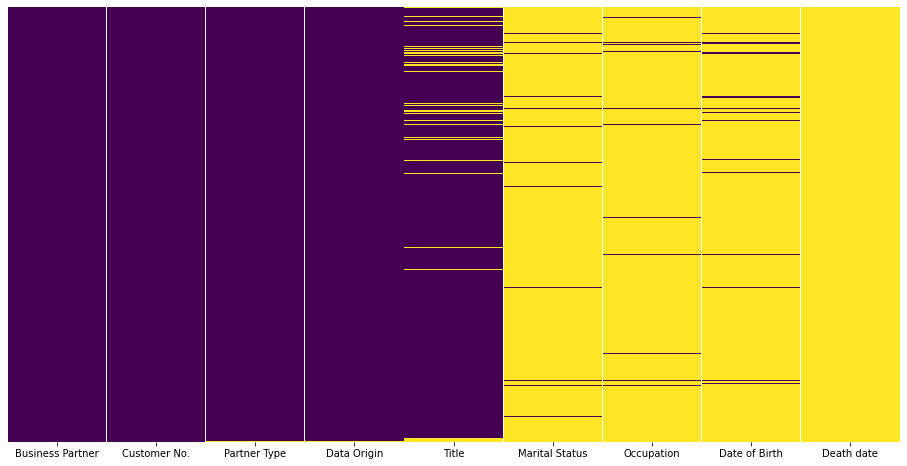

In [ ]:
fig,ax = plt.subplots(figsize = (16,8))
sns.heatmap(cd.isnull(), yticklabels = False, cbar = False, cmap = 'viridis', )
plt.show()

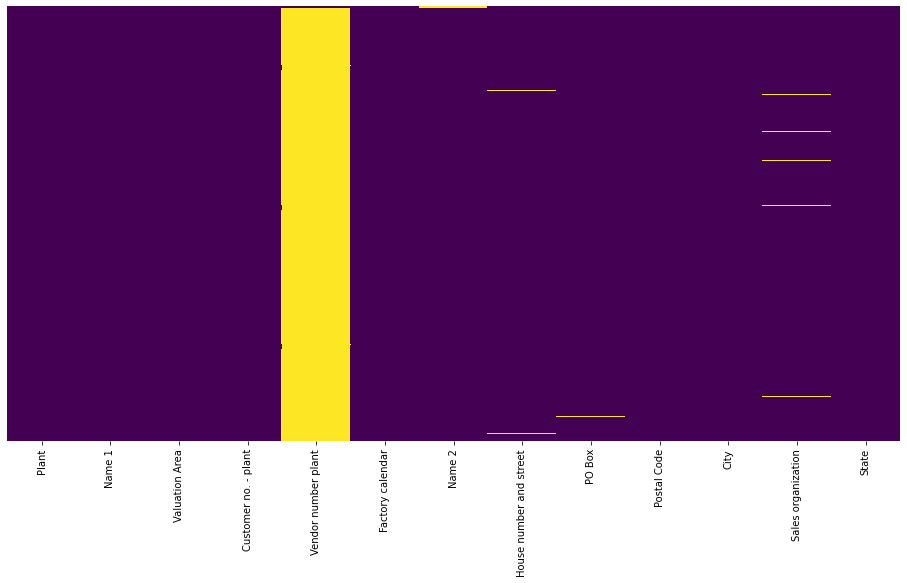

In [ ]:
fig,ax = plt.subplots(figsize = (16,8))
sns.heatmap(pm.isnull(), yticklabels = False, cbar = False, cmap = 'viridis', )
plt.show()

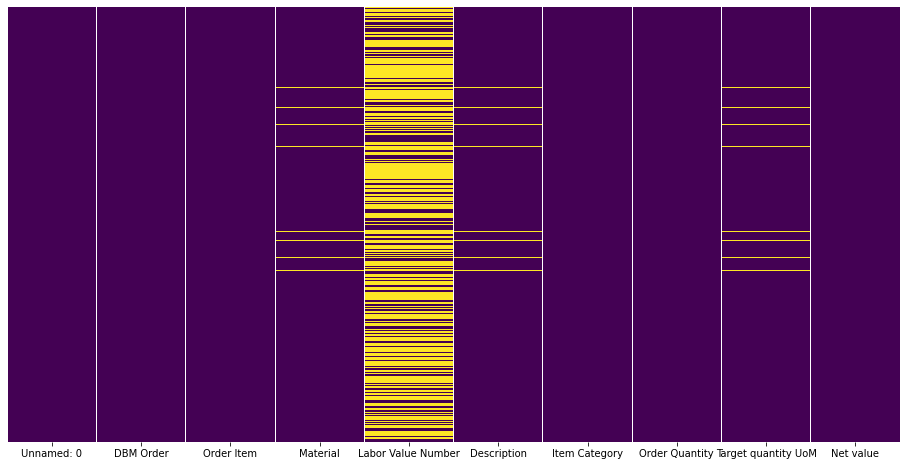

In [ ]:
fig,ax = plt.subplots(figsize = (16,8))
sns.heatmap(jtd.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [ ]:
print("Shape of Customer Data: ", cd.shape, ", Shape of JTD: ",jtd.shape, ", Shape of invoice data: ", invoice.shape)

Shape of Customer Data:  (555338, 9) , Shape of JTD:  (5619484, 10) , Shape of invoice data:  (492314, 59)


In [ ]:
invoice.drop(['CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'Cash /Cashless Type', 'Claim No.','Expiry Date', 'Gate Pass Date','IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)','Policy no.','SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount','Total CGST', 'Total GST', 'Total IGST','Total SGST/UGST','Gate Pass Time'], axis = 1, inplace = True)

In [ ]:
invoice.drop(['Total Amt Wtd Tax.'], inplace=True, axis=1)

In [ ]:
invoice.drop(['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'Outstanding Amt'], axis = 1, inplace=True)

In [ ]:
jtd.drop(['Labor Value Number'], axis = 1, inplace = True)

In [ ]:
pm.drop(['Vendor number plant'], axis=1, inplace=True)

In [ ]:
cd.drop(['Marital Status', 'Occupation', 'Date of Birth', 'Death date'], axis=1, inplace=True)

In [ ]:
invoice_cols_to_date = ['Invoice Date', 'JobCard Date']

In [ ]:
invoice_cols_to_time = ['Invoice Time',  'JobCard Time']

In [ ]:
for i in invoice_cols_to_date:
    invoice[i] = pd.to_datetime(invoice[i], dayfirst=True, yearfirst=False)

In [ ]:
for i in invoice_cols_to_time:
    invoice[i] = pd.to_datetime(invoice[i], format= '%H:%M:%S', ).dt.time

In [ ]:
invoice[invoice['Total Value'].isnull()].head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Value,User ID
295028,730169,MUMBAI,BHANDUP,Retail,119371,Maharashtra,NaN,2016-01-02,7005202789,11:27:27,300412,2016-01-02,10:52:24,35654,1125.76,MARUTI SUZUKI,291.45,ZEN ESTILO,NaN,0.0,SMC Value Package,2082.07,400089,BC01,THANE,YES,0.0,MH02BD6668,NaN,NaN,BC01SA2
295029,730170,THNAE,THANE,Retail,128929,Maharashtra,NaN,2016-01-02,7005202790,13:03:16,300447,2016-01-02,11:50:58,70730,233.85,MARUTI SUZUKI,0.00,SWIFT,NaN,0.0,Running Repairs,195.44,400604,BC01,THANE,YES,0.0,MH12EM2307,NaN,NaN,BC01SA2
295030,730171,MUMBAI,BHANDUP,Retail,119371,Maharashtra,NaN,2016-01-02,7005202791,14:37:52,300443,2016-01-02,11:29:21,163215,0.00,MARUTI SUZUKI,0.00,ZEN ESTILO,NaN,0.0,SMC Redemption,0.00,400089,BC01,THANE,YES,0.0,MH02BD6668,NaN,NaN,BC01SA2
295031,730172,NaN,Thane,Retail,E10724,Maharashtra,NaN,2016-01-02,7005202792,15:57:28,300505,2016-01-02,12:20:38,50220,69.97,FIAT,0.00,PALIO,NaN,0.0,Running Repairs,297.65,400606,BC01,THANE,YES,0.0,MH04CT2685,NaN,NaN,BC01SA2
295032,730173,THNAE,THNAE,Retail,92107,Maharashtra,NaN,2016-01-02,7005202793,16:23:22,300561,2016-01-02,13:06:01,79061,698.64,MARUTI SUZUKI,0.00,SWIFT,NaN,0.0,Paid Service,44.44,400603,BC01,THANE,YES,0.0,MH04GE5258,NaN,NaN,BC01SA2


In [ ]:
invoice['Labour Total']+invoice['OSL Total']+invoice['Parts Total']+invoice['Recovrbl Exp']+invoice['Misc Total']

0          4051.95
1          1001.29
2           233.14
3             0.00
4          2747.12
            ...   
492309     4458.15
492310     6832.08
492311     9187.71
492312    11100.00
492313      747.78
Length: 492314, dtype: float64

In [ ]:
invoice[['Labour Total', 'OSL Total', 'Parts Total', 'Recovrbl Exp', 'Misc Total']]

,Labour Total,OSL Total,Parts Total,Recovrbl Exp,Misc Total
0,1203.14,500.06,2348.75,0.0,0.00
1,804.26,0.00,0.00,0.0,197.03
2,180.19,0.00,52.95,0.0,0.00
3,0.00,0.00,0.00,0.0,0.00
4,1202.97,499.99,944.16,0.0,100.00
...,...,...,...,...,...
492309,2495.90,0.00,1587.28,0.0,374.97
492310,2443.47,0.00,4388.61,0.0,0.00
492311,2598.92,0.00,6588.79,0.0,0.00
492312,11000.00,0.00,0.00,0.0,100.00


In [ ]:
invoice['Total Value Manual']= invoice['Labour Total']+invoice['OSL Total']+invoice['Parts Total']+invoice['Recovrbl Exp']+invoice['Misc Total']
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Value,User ID,Total Value Manual
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,BC01FS1,4051.95
1,1,THNAE,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,BC01SA2,1001.29
2,2,THANE,THANE[W],Retail,81055,Maharashtra,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,BC01SA2,233.14
3,3,THNAE,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,BC01SA2,0.00
4,4,THANE,THANE,Retail,18980,Maharashtra,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,BC01SA2,2747.12


In [ ]:
invoice['Total Value'] - invoice['Total Value Manual']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
492309    NaN
492310    NaN
492311    NaN
492312    NaN
492313    NaN
Length: 492314, dtype: float64

In [ ]:
invoice['Diff'] = invoice['Total Value'] - invoice['Total Value Manual']

In [ ]:
invoice.drop(['Total Value', "Diff"], axis=1, inplace=True)

In [ ]:
invoice[invoice['Technician Name'].isnull()].head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,User ID,Total Value Manual
91,91,THANE,THANE[W],Retail,85432,Maharashtra,NaN,2015-01-14,7005200093,15:34:48,177654,2015-01-14,14:04:30,74097,0.00,MARUTI SUZUKI,0.00,SWIFT,7.005200e+09,0.0,Repeat Order,0.00,400607,BC01,THANE,NO,0.0,MH02JP4905,NaN,BC01SA1,0.00
92,92,NAVI MUMBAI,THANE,Retail,86191,Maharashtra,NaN,2015-01-14,7005200094,17:55:18,177579,2015-01-14,12:09:01,43264,1306.76,MARUTI SUZUKI,319.43,WAGONR,7.005200e+09,0.0,SMC Value Package,1872.71,400614,BC01,THANE,NO,0.0,MH43AL9235,NaN,BC01SA2,3498.90
108,108,THANE,THANE,Retail,86281,Maharashtra,NaN,2015-01-16,7005200110,17:52:20,177770,2015-01-15,10:54:36,70313,820.23,HONDA,180.15,CITY,7.005200e+09,0.0,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH01AE7964,NaN,BC01SA2,1000.38
129,129,G.B.ROAD,THANE,Retail,52385,Maharashtra,NaN,2015-01-18,7005200131,13:15:11,178509,2015-01-18,13:05:02,83467,0.00,TATA MOTORS,0.00,VISTA,7.005200e+09,0.0,Repeat Order,0.00,400607,BC01,THANE,NO,0.0,MH05AX2023,NaN,BC01SA2,0.00
160,160,ROAD THANE,THANE,Retail,39256,Maharashtra,NaN,2015-01-22,7005200162,11:52:02,179644,2015-01-22,10:53:28,29477,804.26,MARUTI SUZUKI,197.03,ZEN ESTILO,7.005200e+09,0.0,SMC Value Package,0.00,400606,BC01,THANE,NO,0.0,MH04DR2210,NaN,BC01SA2,1001.29


In [ ]:
pd.DataFrame(invoice.groupby("User ID")['Technician Name'].value_counts())

Technician Name
User ID  Technician Name                 
23108844 abc                            8
         ABC                            1
         ANISH                          1
         rajesh                         1
         sayyad                         1
...                                   ...
X175WM1  Mahesh                         2
         BHARATH.B                      1
         Bharath                        1
         IMRAN KHAN                     1
         Imaran                         1

[23674 rows x 1 columns]

In [ ]:
invoice['year'] = invoice['Invoice Date'].dt.year
invoice['month'] = invoice['Invoice Date'].dt.month

In [ ]:
months = invoice['month'].unique()
summer = [3,4,5,6]
monsoon = [7,8,9,10]
witner = [11,12,1,2]

In [ ]:
def month_group(x):
  if x in summer:
    return 'Summer'
  elif x in monsoon:
    return 'Monsoon'
  else:
    return 'Winter'

In [ ]:
invoice['Season'] = invoice['month'].map(lambda x: month_group(x))

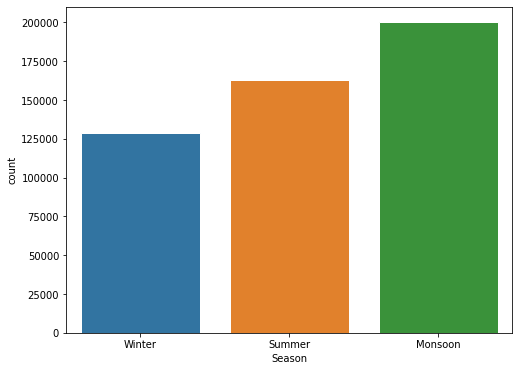

In [ ]:
fig,ax = plt.subplots(figsize = (8,6))
sns.set_style('whitegrid')
sns.countplot(x = 'Season', data = invoice)

## Number of plants in each state?


In [ ]:
top_state = pm.State.value_counts(ascending= False)[:10]
top_state

Rajasthan         52
Maharashtra       48
Tamil Nadu        47
Uttar Pradesh     46
Madhya Pradesh    35
Karnataka         31
Bihar             21
Haryana           20
Punjab            16
Andhra Pradesh    15
Name: State, dtype: int64

Text(0, 0.5, 'Number of counts')

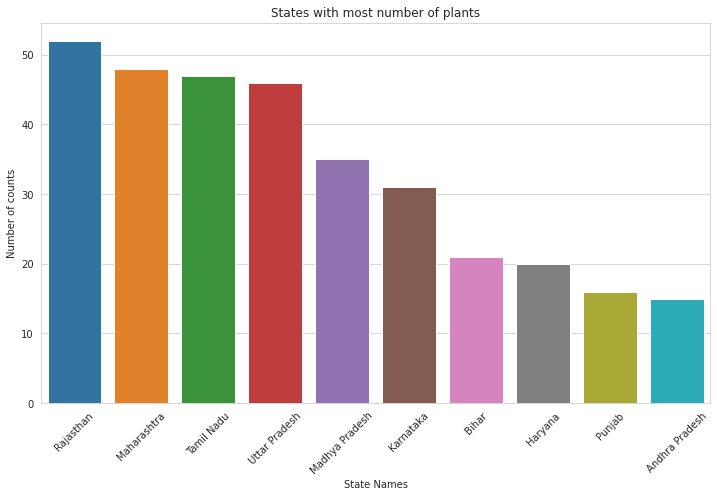

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=pm.State.value_counts()[:10].index, y=pm.State.value_counts()[:10])
plt.xticks(rotation = 45)
plt.title('States with most number of plants')
plt.xlabel('State Names')
plt.ylabel('Number of counts')

Text(0, 0.5, 'Number of counts')

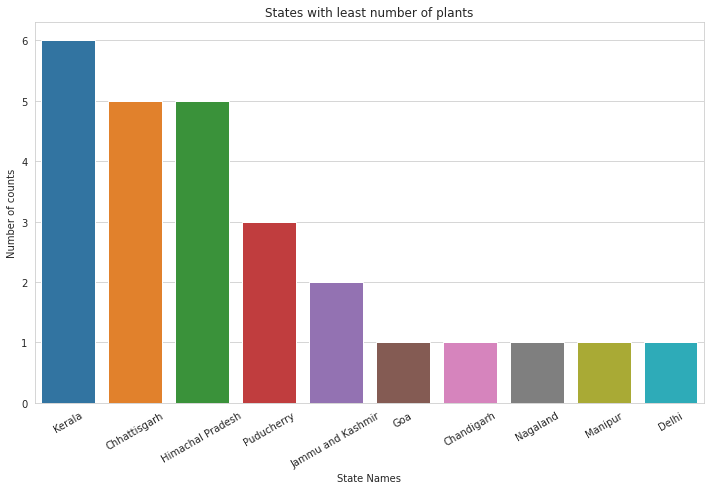

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=pm.State.value_counts(ascending= False)[-10:].index, y=pm.State.value_counts(ascending= False)[-10:])
plt.xticks(rotation = 30)
plt.title('States with least number of plants')
plt.xlabel('State Names')
plt.ylabel('Number of counts')

## Popular makes in top states?
### Expect Bihar from top states Maruti is the popular model

In [ ]:
top_make = invoice.groupby('District')['Make'].value_counts(ascending = False).loc[['Rajasthan','Maharashtra','Tamil Nadu','Uttar Pradesh','Madhya Pradesh','Karnataka','Bihar','Haryana','Punjab','Andhra Pradesh']]
top_make

District        Make                
Andhra Pradesh  MARUTI SUZUKI           11336
                TATA MOTORS              7090
                MAHINDRA &  MAHINDRA     6563
                HYUNDAI                  5933
                GENERAL MOTORS           2405
                                        ...  
Uttar Pradesh   BMW                         5
                HINDUSTAN MOTORS            4
                LAND ROVER                  1
                MORRIS                      1
                VOLVO                       1
Name: Make, Length: 235, dtype: int64

In [ ]:
top_make.groupby('District').head(2)

District        Make                
Andhra Pradesh  MARUTI SUZUKI           11336
                TATA MOTORS              7090
Bihar           MAHINDRA &  MAHINDRA     1578
                TATA MOTORS               641
Haryana         MARUTI SUZUKI            7323
                HYUNDAI                  4024
Karnataka       MARUTI SUZUKI           12375
                HYUNDAI                  6601
Madhya Pradesh  MARUTI SUZUKI            4155
                TATA MOTORS              2663
Maharashtra     MARUTI SUZUKI           41140
                HYUNDAI                 22442
Punjab          MARUTI SUZUKI            7283
                HYUNDAI                  4233
Rajasthan       MARUTI SUZUKI            5325
                MAHINDRA &  MAHINDRA     3282
Tamil Nadu      MAHINDRA &  MAHINDRA    27361
                MARUTI SUZUKI           25984
Uttar Pradesh   MARUTI SUZUKI           12045
                HYUNDAI                  6936
Name: Make, dtype: int64

Text(0, 0.5, 'Count of Makes')

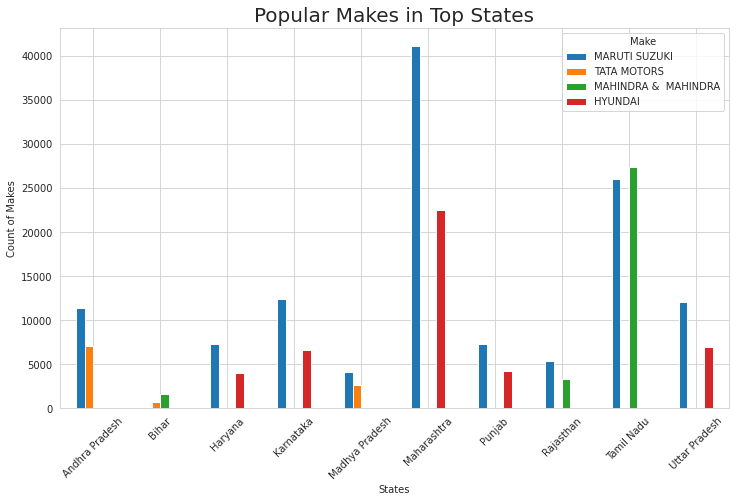

In [ ]:
top_make.groupby('District').head(2).unstack('Make').plot.bar(figsize = (12,7))
plt.xticks(rotation = 45)
plt.title('Popular Makes in Top States',fontsize = 20)
plt.xlabel('States')
plt.ylabel('Count of Makes')

In [ ]:
#top_make = invoice.groupby('District')['Make'].value_counts(ascending = False).loc[['Rajasthan','Maharashtra','Tamil Nadu','Uttar Pradesh','Madhya Pradesh','Karnataka','Bihar','Haryana','Punjab','Andhra Pradesh']].idxmax(axis="columns")
top_make.to_frame(name = 'Count_of_cars').reset_index()

,District,Make,Count_of_cars
0,Andhra Pradesh,MARUTI SUZUKI,11336
1,Andhra Pradesh,TATA MOTORS,7090
2,Andhra Pradesh,MAHINDRA & MAHINDRA,6563
3,Andhra Pradesh,HYUNDAI,5933
4,Andhra Pradesh,GENERAL MOTORS,2405
...,...,...,...
230,Uttar Pradesh,BMW,5
231,Uttar Pradesh,HINDUSTAN MOTORS,4
232,Uttar Pradesh,LAND ROVER,1
233,Uttar Pradesh,MORRIS,1


In [ ]:
# top = invoice.groupby('District')['Make'].value_counts(ascending = False).loc[['Rajasthan','Maharashtra','Tamil Nadu','Uttar Pradesh','Madhya Pradesh','Karnataka','Bihar','Haryana','Punjab','Andhra Pradesh']].size().unstack()
# top.plot(kind='bar',stacked=True,figsize=(20,10))

In [ ]:
pd.pivot_table(invoice,'CITY',index = ['District', 'Make'], aggfunc = 'count').head(5)

CITY
District             Make                      
Andaman and Nico.In. FIAT                     2
                     MAHINDRA &  MAHINDRA     3
                     MARUTI SUZUKI            1
                     TOYOTA                   2
Andhra Pradesh       AUDI                    12

In [ ]:
# table = pd.pivot_table(invoice,index = ['District', 'Make'], values = 'CITY',aggfunc = 'count')
# table.query('District' == [['Rajasthan','Maharashtra','Tamil Nadu','Uttar Pradesh','Madhya Pradesh','Karnataka','Bihar','Haryana','Punjab','Andhra Pradesh']])

## Popular model from top states?

In [ ]:
top_model = invoice.groupby('District')['Model'].value_counts(ascending = False).loc[['Rajasthan','Maharashtra','Tamil Nadu','Uttar Pradesh','Madhya Pradesh','Karnataka','Bihar','Haryana','Punjab','Andhra Pradesh']]
top_model

District        Model     
Andhra Pradesh  ALTO          2695
                SWIFT         2647
                VISTA         2169
                INDICA        2135
                SANTRO        1970
                              ... 
Uttar Pradesh   SANTA FE         1
                TUCSON           1
                VOLVO XC90       1
                X1               1
                YETI             1
Name: Model, Length: 1768, dtype: int64

In [ ]:
top_model.groupby('District').head(3)

District        Model       
Andhra Pradesh  ALTO            2695
                SWIFT           2647
                VISTA           2169
Bihar           BOLERO           442
                SCORPIO NEF      392
                SCORPIO CRDE     355
Haryana         ALTO            1697
                SWIFT           1481
                SANTRO          1242
Karnataka       SWIFT           2955
                INDICA          2094
                INNOVA          2077
Madhya Pradesh  ALTO             965
                SWIFT            881
                INDIGO           783
Maharashtra     SWIFT           8622
                WAGONR          8189
                ALTO            7217
Punjab          SWIFT           2107
                ALTO            1526
                I20             1157
Rajasthan       BOLERO          1419
                SWIFT           1270
                ALTO            1191
Tamil Nadu      INDICA          7310
                SCORPIO CRDE    6305
         

Text(0, 0.5, 'Count of Models')

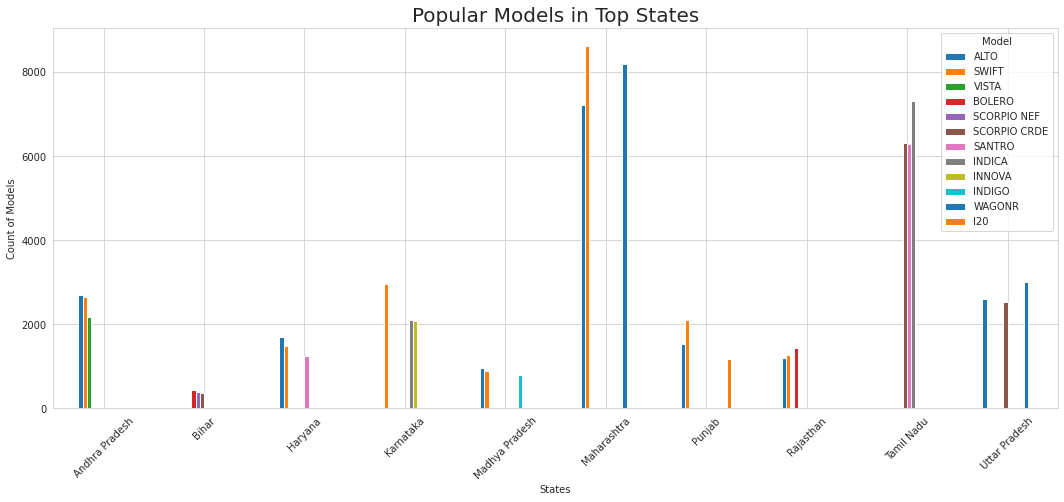

In [ ]:
top_model.groupby('District').head(3).unstack('Model').plot.bar(figsize = (18,7))
plt.xticks(rotation = 45)
plt.title('Popular Models in Top States',fontsize = 20)
plt.xlabel('States')
plt.ylabel('Count of Models')

## What are the customer types we are receiving more?
### 99% of our customers are Retailers & 1% are rest of the others

In [ ]:
invoice['Cust Type'].value_counts(normalize = True)

Retail              0.993258
Fleets              0.004505
Corporate others    0.001176
Corporate- M&M      0.000516
MFCWL               0.000512
Franchise           0.000030
Insurance           0.000002
Name: Cust Type, dtype: float64

Text(0, 0.5, 'Count of each type')

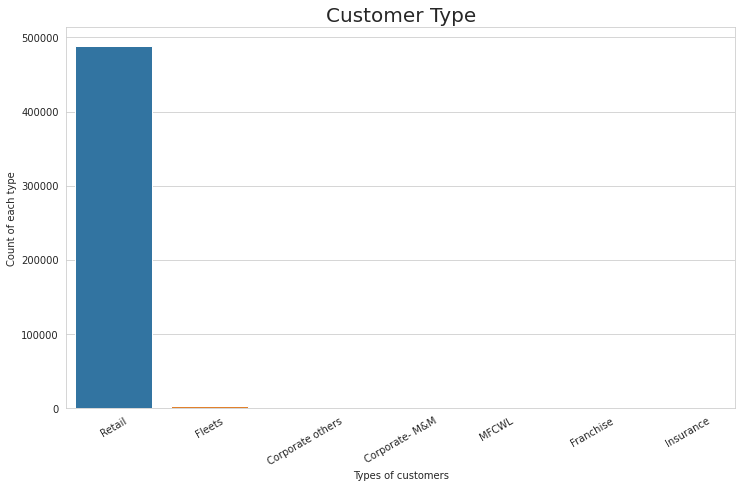

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=invoice['Cust Type'].value_counts(ascending= False).index, y=invoice['Cust Type'].value_counts(ascending= False))
plt.xticks(rotation = 30)
plt.title('Customer Type', fontsize = 20)
plt.xlabel('Types of customers')
plt.ylabel('Count of each type')

## What are the most services that are used by customers?
### - It seems like running services are frequently used by the customers followed by the paid services but it's half of the running services
### - Reapeat orders are very less need to find out what are those?


In [ ]:
invoice['Order Type'].value_counts(ascending = False)

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

Text(0, 0.5, 'Number of counts')

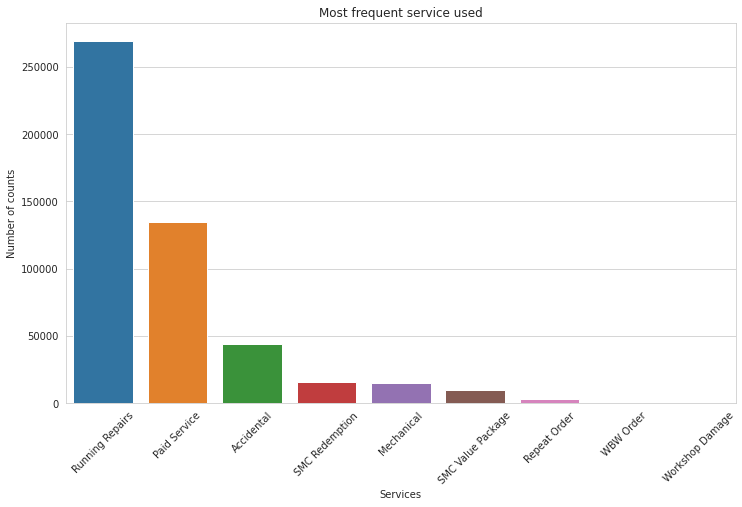

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=invoice['Order Type'].value_counts(ascending = False).index, y=invoice['Order Type'].value_counts(ascending = False))
plt.xticks(rotation = 45)
plt.title('Most frequent service used')
plt.xlabel('Services')
plt.ylabel('Number of counts')

## What are the top service in top states?

In [ ]:
invoice.groupby('District')['Order Type'].value_counts(ascending = False).loc[['Rajasthan','Maharashtra','Tamil Nadu','Uttar Pradesh','Madhya Pradesh','Karnataka','Bihar','Haryana','Punjab','Andhra Pradesh']]

District        Order Type       
Andhra Pradesh  Running Repairs      23302
                Paid Service         10112
                Accidental            4372
                SMC Redemption        1147
                Mechanical             830
                                     ...  
Uttar Pradesh   Accidental            2101
                SMC Value Package     1550
                Repeat Order           529
                Mechanical             254
                WBW Order                1
Name: Order Type, Length: 75, dtype: int64

## Season wise services taken by customers?


In [ ]:
invoice.groupby('Season')['Order Type'].value_counts(ascending = False)

Season   Order Type       
Monsoon  Running Repairs      114430
         Paid Service          59401
         Accidental            17216
         SMC Redemption         5069
         SMC Value Package      3004
         Repeat Order           1014
         WBW Order                17
         Workshop Damage           8
Summer   Running Repairs       79016
         Paid Service          43911
         Accidental            15254
         Mechanical            15100
         SMC Redemption         5422
         SMC Value Package      3495
         Repeat Order            924
         Workshop Damage           3
Winter   Running Repairs       76009
         Paid Service          31692
         Accidental            11689
         SMC Redemption         5247
         SMC Value Package      3282
         Repeat Order           1105
         Workshop Damage           6
Name: Order Type, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

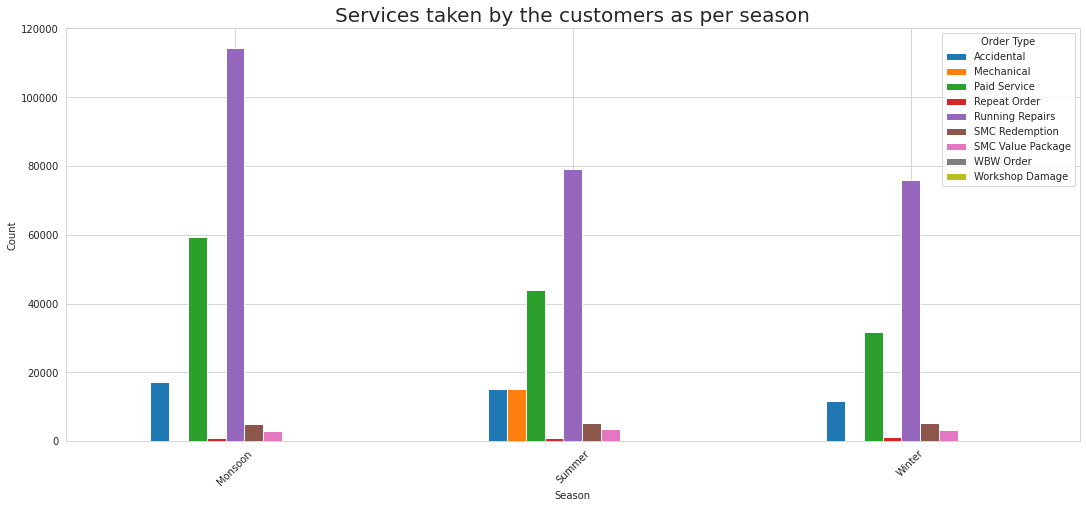

In [ ]:
% matplotlib inline
apn=invoice.groupby(['Season','Order Type']).size().unstack()
apn.plot(kind='bar',stacked=False,figsize=(15,7))
plt.tight_layout()
plt.title('Services taken by the customers as per season', fontsize = 20)
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation = 45)

## Top cars wrt to each season?


In [ ]:
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,User ID,Total Value Manual,year,month,Season
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,BC01FS1,4051.95,2015,1,Winter
1,1,THNAE,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,BC01SA2,1001.29,2015,1,Winter
2,2,THANE,THANE[W],Retail,81055,Maharashtra,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,BC01SA2,233.14,2015,1,Winter
3,3,THNAE,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,BC01SA2,0.00,2015,1,Winter
4,4,THANE,THANE,Retail,18980,Maharashtra,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,BC01SA2,2747.12,2015,1,Winter


In [ ]:
top_make_season = invoice.groupby(['Season', 'Make'])['Model'].value_counts(ascending = False)

In [ ]:
top_make_season.groupby(['Season', 'Make']).head(3)
#top_model.groupby('District').head(3)

Season   Make        Model     
Monsoon  AUDI        Q5             30
                     A4             29
                     Q7             19
         BMW         5 SERIES       22
                     X1             18
                                  ... 
Winter   VOLKSWAGEN  POLO          824
                     VENTO         550
                     JETTA          77
         VOLVO       VOLVO XC90      4
                     VOLVO S80       2
Name: Model, Length: 204, dtype: int64

## Top Makes wrt to Profit?
### Most of the profit is generated from MAHINDRA &  MAHINDRA, MARUTI SUZUKI, HYUNDAI

> Indented block



In [ ]:
invoice.groupby('Make')['Total Value Manual'].sum().sort_values(ascending = False).head()

Make
MAHINDRA &  MAHINDRA    5.726803e+08
MARUTI SUZUKI           4.727120e+08
HYUNDAI                 3.143526e+08
TATA MOTORS             2.513642e+08
GENERAL MOTORS          1.305304e+08
Name: Total Value Manual, dtype: float64

Text(0, 0.5, 'Income')

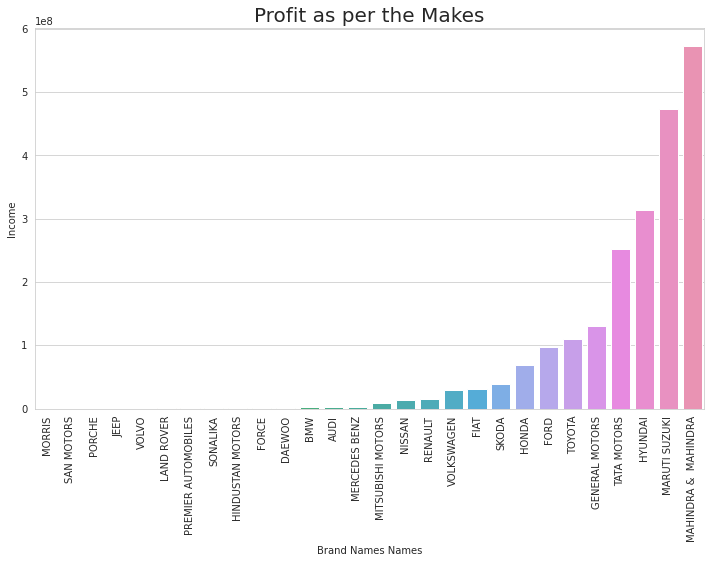

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=invoice.groupby('Make')['Total Value Manual'].agg('sum').sort_values().index, y=invoice.groupby('Make')['Total Value Manual'].agg('sum').sort_values())
plt.xticks(rotation = 90)
plt.title('Profit as per the Makes', fontsize = 20)
plt.xlabel('Brand Names Names')
plt.ylabel('Income')

## Which services give more revenue?
### It seems like running services are most occering services but most of the revenue is generated by the accidental cases
### But running repairs is also one of the top grosser for us

In [ ]:
invoice.groupby('Order Type')['Total Value Manual'].agg('sum')

Order Type
Accidental           7.556233e+08
Mechanical           4.749905e+07
Paid Service         6.452922e+08
Repeat Order         4.006740e+03
Running Repairs      6.789849e+08
SMC Redemption       1.674224e+06
SMC Value Package    3.507968e+07
WBW Order            1.312780e+05
Workshop Damage      0.000000e+00
Name: Total Value Manual, dtype: float64

Text(0, 0.5, 'Income')

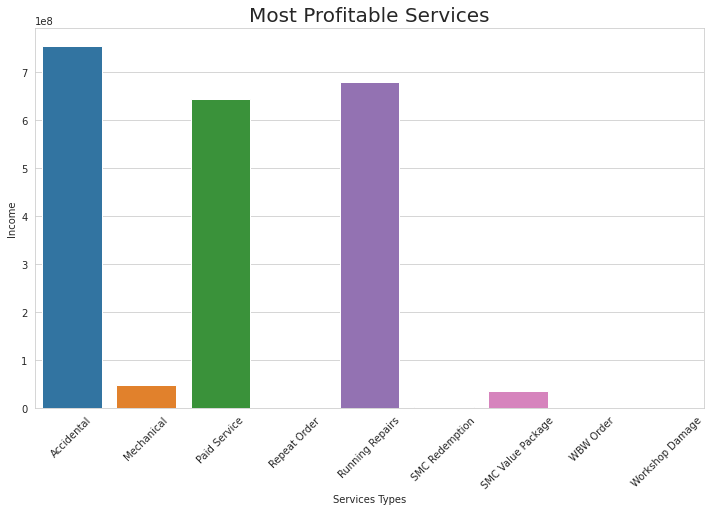

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=invoice.groupby('Order Type')['Total Value Manual'].agg('sum').index, y=invoice.groupby('Order Type')['Total Value Manual'].agg('sum'))
plt.xticks(rotation = 45)
plt.title('Most Profitable Services', fontsize = 20)
plt.xlabel('Services Types')
plt.ylabel('Income')

## Which states give more business?
#### Interesting facts Tamil Nadu gives the highest amount of business & Tripura, Sikkim being the lowest.
#### Despite of being in the 'Top 10 states having more number of plants' Bihar is on 15th place of 'Top profitable States'.
#### On the otherhand Gujarti is doing pretty good job as its in 'Top 10 most profitable states' despite having less number of plants.

In [ ]:
invoice.groupby('District')['Total Value Manual'].sum().head()

District
Andaman and Nico.In.    7.203385e+04
Andhra Pradesh          2.026395e+08
Arunachal Pradesh       1.314287e+05
Assam                   3.058994e+05
Bihar                   1.496335e+07
Name: Total Value Manual, dtype: float64

Text(0, 0.5, 'Income')

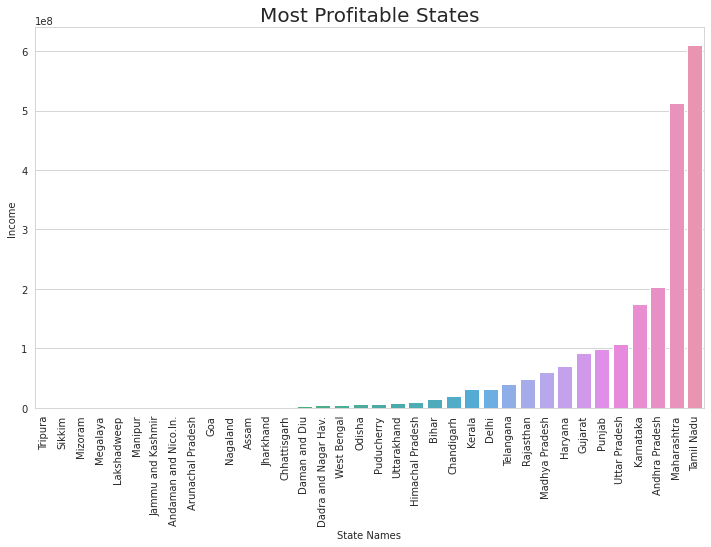

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=invoice.groupby('District')['Total Value Manual'].agg('sum').sort_values().index, y=invoice.groupby('District')['Total Value Manual'].agg('sum').sort_values())
plt.xticks(rotation = 90)
plt.title('Most Profitable States', fontsize = 20)
plt.xlabel('State Names')
plt.ylabel('Income')

In [ ]:
invoice['Days_taken'] = (invoice['Invoice Date'] - invoice['JobCard Date']).dt.days

In [ ]:
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,User ID,Total Value Manual,year,month,Season,Days_taken
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,BC01FS1,4051.95,2015,1,Winter,20
1,1,THNAE,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,BC01SA2,1001.29,2015,1,Winter,1
2,2,THANE,THANE[W],Retail,81055,Maharashtra,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,BC01SA2,233.14,2015,1,Winter,1
3,3,THNAE,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,BC01SA2,0.00,2015,1,Winter,0
4,4,THANE,THANE,Retail,18980,Maharashtra,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,BC01SA2,2747.12,2015,1,Winter,1


In [ ]:
cd.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title
0,31,1,1.0,Z001,NaN
1,32,2,1.0,Z005,NaN
2,34,4,1.0,Z005,NaN
3,35,5,1.0,Z005,NaN
4,42,7,1.0,Z008,NaN


In [ ]:
cd['Data Origin'].value_counts()

Z005    149861
Z006    121660
Z001     63237
Z002     38326
Z004     36801
Z019     29780
Z021     28828
Z018     15382
Z013     13967
Z008     12122
Z016      8118
Z011      8023
Z010      6260
Z017      5685
Z003      5082
Z014      4014
Z012      3840
Z007      2069
Z015       745
Z009       735
Z020       590
Z022        77
Name: Data Origin, dtype: int64

Text(0, 0.5, 'Count')

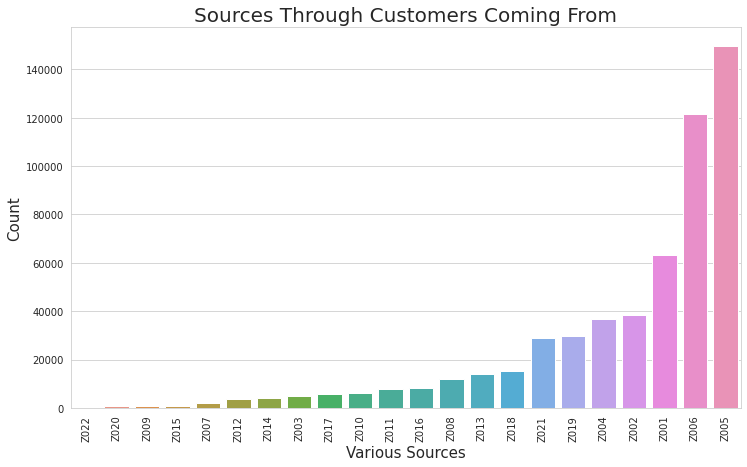

In [ ]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=cd['Data Origin'].value_counts().sort_values().index, y=cd['Data Origin'].value_counts().sort_values())
plt.xticks(rotation = 90)
plt.title('Sources Through Customers Coming From', fontsize = 20)
plt.xlabel('Various Sources',fontsize = 15)
plt.ylabel('Count',fontsize = 15)

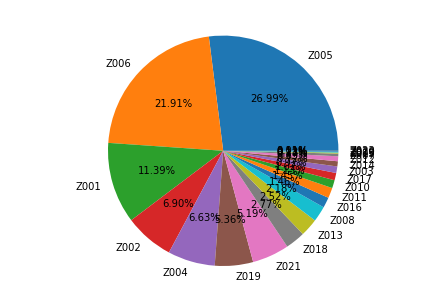

In [ ]:
#fig,ax = plt.subplots(figsize = (12,7))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(cd['Data Origin'].value_counts(), labels = cd['Data Origin'].value_counts().index,autopct='%1.2f%%')
plt.show()

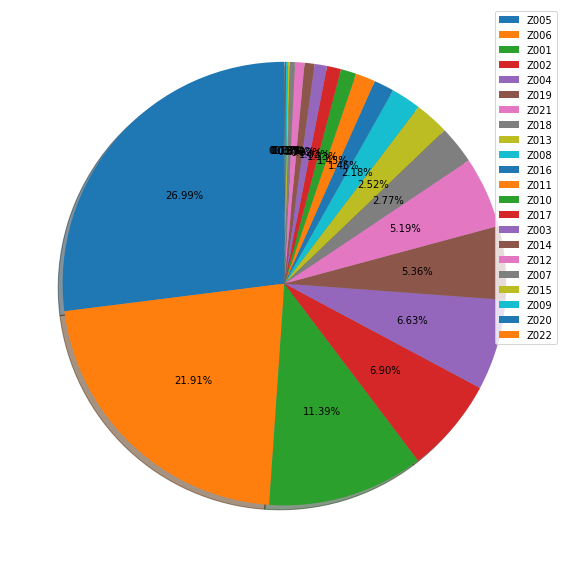

In [ ]:
## Adding a legend to the chart and increasing its size 
labels = cd['Data Origin'].value_counts().index
#colors = [‘lightskyblue’, ‘red’, ‘blue’, ‘green’, ‘gold’] 
#explode =(0,0.1,0,0.1,0) 
fig, ax1 = plt.subplots(figsize = (16,8)) 
ax1.pie(cd['Data Origin'].value_counts(), startangle=90, autopct= '%1.2f%%', shadow = True) 
#plt.title(“, fontsize = 24) 
ax1.legend(labels, loc = 'upper right') 
plt.tight_layout() 
plt.show()

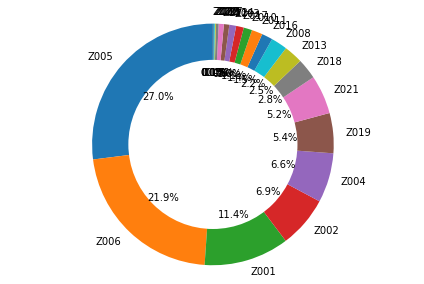

In [ ]:
labels = cd['Data Origin'].value_counts().index
fig1, ax1 = plt.subplots()
ax1.pie(cd['Data Origin'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
def check_prime(num):
  for i in range(2,num):
    if num % i == 0:
      print('not prime')
      break
  else:
    print('prime')

In [ ]:
check_prime(17)

prime
